In [11]:
import numpy as np
import seaborn as sns
import pandas as pd

import scipy
from statannotations.Annotator import Annotator


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (7, 7)

plt.rc('axes', linewidth=2)
sns.set()
sns.set_style("white")
sns.set_context("poster")

sns.set_palette('muted')

In [84]:
cm = 1/2.54
plt.rcParams['pdf.fonttype'] = 42

In [2]:
intensities = pd.read_csv('./vectra_gloms_nongloms.csv')

In [3]:
intensities = pd.melt(intensities, var_name='Type')

In [4]:
def sample_type(name):
    return 'Control' if name[0] == 'C' else 'Treated'

def patch_type(name):
    return 'Non-glom' if name[-6] == 'n' else 'Glom'

In [5]:
intensities['Sample'] = intensities['Type'].apply(sample_type)

In [6]:
intensities['Patch-type'] = intensities['Type'].apply(patch_type)

In [7]:
intensities['Intensity'] = intensities['value']

In [8]:
intensities

,Type,value,Sample,Patch-type,Intensity
0,Control-Non-glom,10.336199,Control,Non-glom,10.336199
1,Control-Non-glom,13.391541,Control,Non-glom,13.391541
2,Control-Non-glom,13.508889,Control,Non-glom,13.508889
3,Control-Non-glom,14.385007,Control,Non-glom,14.385007
4,Control-Non-glom,16.773695,Control,Non-glom,16.773695
...,...,...,...,...,...
295,IMQ-Glom,19.251921,Treated,Glom,19.251921
296,IMQ-Glom,19.151830,Treated,Glom,19.151830
297,IMQ-Glom,18.839120,Treated,Glom,18.839120
298,IMQ-Glom,18.351790,Treated,Glom,18.351790


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Treated_Glom vs. Treated_Non-glom: Welch's t-test independent samples, P_val:5.626e-12 t=7.438e+00
Control_Glom vs. Control_Non-glom: Welch's t-test independent samples, P_val:6.288e-01 t=-3.294e-01


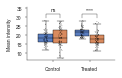

In [139]:
# b = sns.barplot(data=intensities, x='Sample', hue='Patch-type', y='Intensity',
#                 edgecolor='black', linewidth=3, capsize=.1, 
#                 palette={'Glom': '#4878d0', 'Non-glom': '#ee854a'})

# b.set_xlabel("",fontsize=40)
# b.set_ylabel("CD45 Intensity",fontsize=40)
# b.tick_params(labelsize=36)

# ax = plt.gca()
sns.set(style="ticks", context='paper', font="Arial")

plt.rcParams['figure.figsize'] = (4*cm, 2.5*cm)


ax = plt.gca()


plot_params = dict(data=intensities, x='Sample',  hue='Patch-type', y='Intensity', hue_order=["Glom", "Non-glom"],
                    linewidth=1*cm, showfliers=False, boxprops={'edgecolor': 'black'},
                   medianprops={'color': 'black'}, whiskerprops = {'color': 'black'}, capprops = {'color': 'black'},
                   palette={'Glom': '#4878d0', 'Non-glom': '#ee854a'}) # errorbar='se',


b = sns.boxplot(ax=ax, **plot_params)


sns.stripplot(
    data=intensities,
    x="Sample", 
    y="Intensity", 
    hue="Patch-type", s=1.5*cm, linewidth=0, edgecolor='black', alpha=1, facecolor='black',
    dodge=True, ax=ax, jitter=0.1, hue_order=["Glom", "Non-glom"], palette={'Glom': 'black', 'Non-glom': 'black'}
)


b.set_xlabel("",fontsize=5)
b.set_ylabel("Mean intensity",fontsize=5)
b.tick_params(labelsize=5)

pairs = [(('Control', 'Glom'), ('Control', 'Non-glom')),
         (('Treated', 'Glom'), ('Treated', 'Non-glom'))]
annotator = Annotator(ax, pairs, **plot_params)
annotator.configure(line_height=0.1, line_width=1*cm)
annotator._pvalue_format.fontsize = 5
annotator.configure(test="t-test_welch")
annotator.apply_test(alternative='greater')
annotator.annotate()

ax.get_legend().remove()

ax.spines['left'].set_linewidth(1*cm)
ax.spines['bottom'].set_linewidth(1*cm)
# ax.get_legend().remove()

sns.despine(top=True, right=True)

plt.yticks([10,15,20,25,30,35])
ax.yaxis.set_tick_params(width=1*cm, length=2)
ax.xaxis.set_tick_params(width=1*cm, length=2)

plt.savefig('vectra_glomnonglom.pdf', bbox_inches='tight')

In [86]:
ratios = pd.read_csv('./vectra_inner_outer.csv')

In [87]:
ratios = pd.melt(ratios, var_name='Sample')
ratios['Ratio'] = ratios['value']

In [88]:
ratios['Marker'] = 'All'

In [89]:
tcellratios = pd.read_csv('./vectra_inner_outer_tcells.csv')

In [90]:
tcellratios = pd.melt(tcellratios, var_name='Sample')

In [91]:
tcellratios['Ratio'] = tcellratios['value']

In [92]:
tcellratios['Marker'] = 'T-cell'

In [93]:
bcellratios = pd.read_csv('./vectra_inner_outer_cd19.csv')

In [94]:
bcellratios = pd.melt(bcellratios, var_name='Sample')

In [95]:
bcellratios['Ratio'] = bcellratios['value']

In [96]:
bcellratios['Marker'] = 'B-cell'

In [97]:
myeloidratios = pd.read_csv('./vectra_inner_outer_cd11b.csv')
myeloidratios = pd.melt(myeloidratios, var_name='Sample')
myeloidratios['Ratio'] = myeloidratios['value']
myeloidratios['Marker'] = 'Myeloid'

In [98]:
allratios = pd.concat([ratios, tcellratios, bcellratios, myeloidratios], axis=0)

In [124]:
myeloidratios

,Sample,value,Ratio,Marker
0,Control,0.444711,0.444711,Myeloid
1,Control,NaN,NaN,Myeloid
2,Control,0.627687,0.627687,Myeloid
3,Control,1.487481,1.487481,Myeloid
4,Control,NaN,NaN,Myeloid
...,...,...,...,...
145,Treated,1.681885,1.681885,Myeloid
146,Treated,2.748920,2.748920,Myeloid
147,Treated,1.344759,1.344759,Myeloid
148,Treated,1.485602,1.485602,Myeloid


In [119]:
tcellratios

,Sample,value,Ratio,Marker
0,Control,0.298817,0.298817,T-cell
1,Control,1.893333,1.893333,T-cell
2,Control,1.077378,1.077378,T-cell
3,Control,1.138212,1.138212,T-cell
4,Control,2.497889,2.497889,T-cell
...,...,...,...,...
85,Treated,2.073566,2.073566,T-cell
86,Treated,1.984047,1.984047,T-cell
87,Treated,1.896780,1.896780,T-cell
88,Treated,1.841425,1.841425,T-cell


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

T-cell_Control vs. T-cell_Treated: Welch's t-test independent samples, P_val:2.663e-06 t=-4.957e+00
All_Control vs. All_Treated: Welch's t-test independent samples, P_val:7.276e-05 t=-3.917e+00
B-cell_Control vs. B-cell_Treated: Welch's t-test independent samples, P_val:2.459e-01 t=-6.895e-01
Myeloid_Control vs. Myeloid_Treated: Welch's t-test independent samples, P_val:2.308e-03 t=-2.890e+00


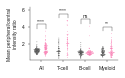

In [138]:
sns.set(style="ticks", context='paper', font="Arial")

plt.rcParams['figure.figsize'] = (4*cm, 2.5*cm)


ax = plt.gca()

plot_params = dict(data=allratios, x='Marker', y='Ratio', hue='Sample', dodge=True,
                   linewidth=0, s=1.5*cm, alpha=1, palette={'Treated': '#f84593', 'Control': 'black'})

b = sns.swarmplot(ax=ax, **plot_params)



pairs = [
#     (('All', 'Control'), ('T-cell', 'Control')),
         (('T-cell', 'Control'), ('T-cell', 'Treated')),
         (('All', 'Control'), ('All', 'Treated')),
         (('B-cell', 'Control'), ('B-cell', 'Treated')),
         (('Myeloid', 'Control'), ('Myeloid', 'Treated')),

#         (('All', 'Treated'), ('T-cell', 'Treated'))

        ]
annotator = Annotator(ax, pairs, **plot_params)
annotator.configure(line_height=0.1, line_width=1*cm)
annotator._pvalue_format.fontsize = 5
annotator.configure(test="t-test_welch")
annotator.apply_test(alternative='less')
annotator.annotate()



b.set_xlabel("",fontsize=5)
b.set_ylabel("Mean peripheral/central\nintensity ratio",fontsize=5)
b.tick_params(labelsize=5)

sns.despine(top=True, right=True)

# plt.ylim([0.8,1.2])
# plt.xlim([-0.5,1.5])
ax.spines['left'].set_linewidth(1*cm)
ax.spines['bottom'].set_linewidth(1*cm)
ax.yaxis.set_tick_params(width=1*cm, length=2)
ax.xaxis.set_tick_params(width=1*cm, length=2)

plt.legend().remove()

plt.savefig('./inner_outer.pdf', bbox_inches='tight')

In [14]:
ti = intensities[intensities.Sample == 'Treated']

In [18]:
gl = ti[ti["Patch-type"] == 'Glom'].Intensity

In [20]:
ng = ti[ti["Patch-type"] == 'Non-glom'].Intensity

In [42]:
gl.shape

(41,)

In [44]:
ng.shape

(10,)

In [40]:
np.mean(gl)

174.28621951219512

In [23]:
np.std(gl, ddof=1)/np.sqrt(np.shape(gl))

array([2.83126826])

In [24]:
np.mean(ng)

160.01597900000002

In [25]:
np.std(ng, ddof=1)/np.sqrt(np.shape(ng))

array([3.59519824])

In [30]:
tr = ratios[ratios.Sample == 'Treated'].Ratio

In [32]:
np.mean(tr)

1.0189919604444444

In [33]:
co = ratios[ratios.Sample == 'Control'].Ratio

In [34]:
np.mean(co)

0.9933985193333335

In [35]:
np.std(tr, ddof=1)/np.sqrt(np.shape(tr))

array([0.00585139])

In [36]:
np.std(co, ddof=1)/np.sqrt(np.shape(co))

array([0.00447656])